In [3]:
from tesszap.timeseries import Timeseries
from tesszap.strategies import Central
from tesszap.models import Transit
%matplotlib inline

Let's simulate a general timeseries, that's been stacked together using the a Central 8/10 strategy:

In [7]:
# let's create a stacking strategy object
strategy = Central(10)

# let's create a general timeseries
timeseries = Timeseries(model=Transit(a_over_rs=5, period=1.6), 
                                   tmin=-5, tmax=5,
                                   cadence=1800.0, subcadence=2.0, 
                                   subcadenceuncertainty=0.01,
                                   cosmickw=dict(probability=0.001, height=1))

Now, let's process that timeseries using the stacking strategy.

In [8]:
# stack the subcadences together into the binned cadence
timeseries.stack(strategy)

# print out the noise associated with these
for k in timeseries.rms.keys():
    print('{:>20} noise is {:.3}'.format(k, timeseries.rms[k]))

         unmitigated noise is 0.000468
            achieved noise is 0.000363
            expected noise is 0.000333


Let's see what this looks like as a static plot.

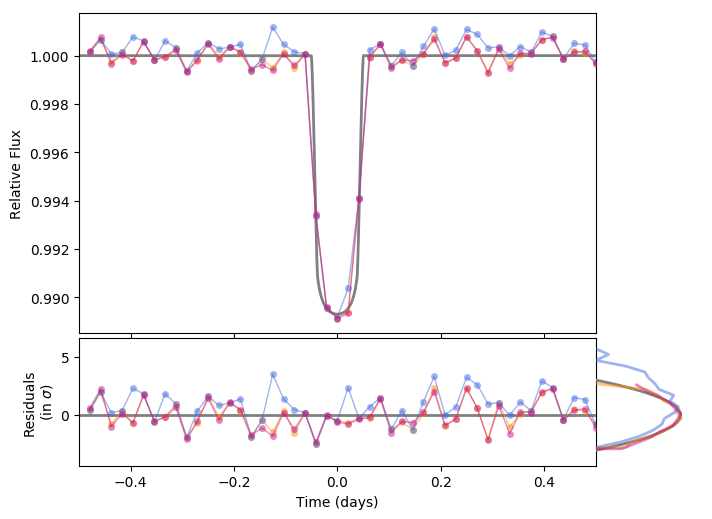

In [9]:
timeseries.plot(xlim=[-.5, 0.5])

It'd also be good to show *all* the data points. Let's see what they look like by sliding through the whole light curve as an animation.

In [10]:
timeseries.movie(filename='generaltransit.mp4')

100%|██████████| 301/301 [00:13<00:00, 22.74it/s]


<video controls src="generaltransit.mp4" width=800/>